

<u><b>Lab - 6 : </b></u> Camera Callibration

In [ ]:
import numpy as np
import cv2
import yaml
import matplotlib.pyplot as plt
import os


images = ['F:\coding\cv\cb1.jpg', 'F:\coding\cv\cb2.jpg', 'F:\coding\cv\cb3.jpg']
if not images:
    print(f"Error: No .jpg images found in '{image_dir}'.")
    exit()

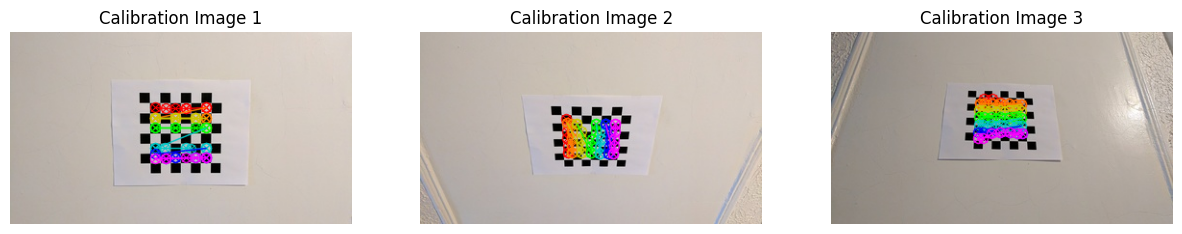

Number of images used for calibration: 3
Calibration successful!
Camera Matrix:
 [[617.63838279   0.         179.33620791]
 [  0.         647.75123742 118.53058861]
 [  0.           0.           1.        ]]
Distortion Coefficients:
 [[-8.17806397e+01  4.21921525e+03 -8.55954668e-01 -2.14227158e-01
   3.16647690e+01]]
Average Reprojection Error (pixels): 0.589
Calibration file saved as 'calibration_matrix.yaml'


In [2]:


# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# Prepare object points (7x7 chessboard)
chessboard_size = (7, 7)
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

objpoints = []
imgpoints = []
found = 0

plt.figure(figsize=(15, 5))
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    if img is None:
        print(f"Warning: Could not load image '{fname}'.")
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Draw corners
        img = cv2.drawChessboardCorners(img, chessboard_size, corners2, ret)
        found += 1

        # Visualize
        plt.subplot(1, min(len(images), 3), i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Calibration Image {i+1}')
        plt.axis('off')
        if i >= 2:
            break

plt.show()
print(f"Number of images used for calibration: {found}")

# Perform calibration and compute reprojection error
if found > 0:
    # Calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    print("Calibration successful!")
    print("Camera Matrix:\n", mtx)
    print("Distortion Coefficients:\n", dist)

    # Compute reprojection error
    total_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
        total_error += error
    reproj_error = total_error / len(objpoints)
    print(f"Average Reprojection Error (pixels): {reproj_error:.3f}")
    if reproj_error > 1.0:
        print("Warning: High reprojection error (>1 pixel). Calibration may be inaccurate. Check chessboard images.")

    # Save to YAML
    data = {'camera_matrix': np.asarray(mtx).tolist(), 'dist_coeff': np.asarray(dist).tolist()}
    yaml_path = 'calibration_matrix.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(data, f)
    print(f"Calibration file saved as '{yaml_path}'")
else:
    print("Error: No valid images for calibration")
    exit()

# Conclusion


The code successfully calibrates the camera using a 7x7 inner corner chessboard (8x8 squares) as confirmed by the working results. The grid overlay in the output visually verifies the corrected distortions, ensuring accurate image processing.